# Section 5.2
## Handle the dataset
Data is stored in project root directory under datsets and a small subset is copied to chapter directory/datasets. It is split into 1000, 500, 500 train validate and test samples each in its own folder.

NOTE: add commands that will use kagggle api to pull data.

In [1]:
import os, shutil

def create_dir_if_not_existing(dir_name):
    # This function cretes a directory if it does not exist otherwise it prints that it exists and continues.
    try:
        os.mkdir(dir_name) 
    except FileExistsError:
        print(f'Directory:"{dir_name}" already exists, continuing.')
    
original_dataset_dir = '../datasets/dogs-vs-cats/train'
# Create directories.
base_dir = './datasets/cats_and_dogs_small'
create_dir_if_not_existing(base_dir)

train_dir = os.path.join(base_dir, 'train') 
create_dir_if_not_existing(train_dir)

validation_dir = os.path.join(base_dir, 'validation') 
create_dir_if_not_existing(validation_dir)

test_dir = os.path.join(base_dir, 'test') 
create_dir_if_not_existing(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats') 
create_dir_if_not_existing(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs') 
create_dir_if_not_existing(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats') 
create_dir_if_not_existing(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs') 
create_dir_if_not_existing(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats') 
create_dir_if_not_existing(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs') 
create_dir_if_not_existing(test_dogs_dir)

# Split [train valdiate test] as [1000].
def copy_datset(fnames,src_dir,dst_dir):
    for fname in fnames:
        src = os.path.join(src_dir, fname)
        dst = os.path.join(dst_dir, fname)
        shutil.copyfile(src,dst)
       

Directory:"./datasets/cats_and_dogs_small" already exists, continuing.
Directory:"./datasets/cats_and_dogs_small\train" already exists, continuing.
Directory:"./datasets/cats_and_dogs_small\validation" already exists, continuing.
Directory:"./datasets/cats_and_dogs_small\test" already exists, continuing.
Directory:"./datasets/cats_and_dogs_small\train\cats" already exists, continuing.
Directory:"./datasets/cats_and_dogs_small\train\dogs" already exists, continuing.
Directory:"./datasets/cats_and_dogs_small\validation\cats" already exists, continuing.
Directory:"./datasets/cats_and_dogs_small\validation\dogs" already exists, continuing.
Directory:"./datasets/cats_and_dogs_small\test\cats" already exists, continuing.
Directory:"./datasets/cats_and_dogs_small\test\dogs" already exists, continuing.


In [13]:
# Copy dataset to target directories.
# THIS SHOULD BE DONE ONCE!.
# copy_datset([f'cat.{i}.jpg' for i in range(1000)], original_dataset_dir, train_cats_dir)
# copy_datset([f'dog.{i}.jpg' for i in range(1000)], original_dataset_dir, train_dogs_dir)

# copy_datset([f'cat.{i}.jpg' for i in range(1000,1500)], original_dataset_dir, validation_cats_dir)
# copy_datset([f'dog.{i}.jpg' for i in range(1000,1500)], original_dataset_dir, validation_dogs_dir)

# copy_datset([f'cat.{i}.jpg' for i in range(1500,2000)], original_dataset_dir, test_cats_dir)
# copy_datset([f'dog.{i}.jpg' for i in range(1500,2000)], original_dataset_dir, test_dogs_dir)

Directory:"./datasets/cats_and_dogs_small" already exists, continuing.
Directory:"./datasets/cats_and_dogs_small\train" already exists, continuing.
Directory:"./datasets/cats_and_dogs_small\validation" already exists, continuing.
Directory:"./datasets/cats_and_dogs_small\test" already exists, continuing.
Directory:"./datasets/cats_and_dogs_small\train\cats" already exists, continuing.
Directory:"./datasets/cats_and_dogs_small\train\dogs" already exists, continuing.
Directory:"./datasets/cats_and_dogs_small\validation\cats" already exists, continuing.
Directory:"./datasets/cats_and_dogs_small\validation\dogs" already exists, continuing.
Directory:"./datasets/cats_and_dogs_small\test\cats" already exists, continuing.
Directory:"./datasets/cats_and_dogs_small\test\dogs" already exists, continuing.


In [4]:
# Check number of images.
print(f"Train cat images:{len(os.listdir(train_cats_dir))}")
print(f"Train dog images:{len(os.listdir(train_dogs_dir))}")
print(f"Validation cat images:{len(os.listdir(validation_cats_dir))}")
print(f"Validation dog images:{len(os.listdir(validation_dogs_dir))}")
print(f"Test cat images:{len(os.listdir(test_cats_dir))}")
print(f"Test dog images:{len(os.listdir(test_dogs_dir))}")

Train cat images:1000
Train dog images:1000
Validation cat images:500
Validation dog images:500
Test cat images:500
Test dog images:500


NOTE: since we have a balanced number of cats and dogs in a dataset accutracy is a valid meaure of succses (this is a balanced binary calssification problem)

## Preprocess data by using data generators.


In [19]:
from keras.preprocessing.image import ImageDataGenerator
# These are generators that can be used to create set up generators that will iterate over images in data folders.
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

def make_image_generator(datagen,directory):
    return datagen.flow_from_directory(directory,
                                       target_size=(150, 150), 
                                       batch_size=20, 
                                       class_mode='binary')

# These are the generators that will generate the training images themselfs.
train_generator = make_image_generator(train_datagen, train_dir)
validation_generator = make_image_generator(validation_datagen, validation_dir)
test_generator = make_image_generator(test_datagen, test_dir)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## Create network

In [20]:
from keras import layers, models, optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy', optimizer=optimizers.rmsprop(lr=1e-4), metrics=['acc'])

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv

# Train the network using generators

In [28]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=50)
model.save('cats_and_dogs_small_1.h5')
(test_loss, test_acc) = model.evaluate_generator(test_generator, steps=50)

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
100/100 [==============================] - 59s 594ms/step - loss: 0.6907 - acc: 0.5240 - val_loss: 0.6705 - val_acc: 0.6080
Epoch 2/30
100/100 [==============================] - 56s 556ms/step - loss: 0.6600 - acc: 0.5945 - val_loss: 0.6400 - val_acc: 0.6580
Epoch 3/30
100/100 [==============================] - 56s 564ms/step - loss: 0.6073 - acc: 0.6725 - val_loss: 0.6333 - val_acc: 0.6560
Epoch 4/30
100/100 [==============================] - 60s 602ms/step - loss: 0.5741 - acc: 0.6900 - val_loss: 0.6351 - val_acc: 0.6270
Epoch 5/30
100/100 [==============================] - 56s 559ms/step - loss: 0.5453 - acc: 0.7150 - val_loss: 0.6043 - val_acc: 0.6780
Epoch 6/30
100/100 [==============================] - 57s 565ms/step - loss: 0.5262 - acc: 0.7360 - val_loss: 0.5745 - val_acc: 0.6830
Epoch 7/30
100/100 [==============================] - 56s 564ms/step - loss: 0.5069 - acc: 0.7450 - val_loss: 0.5655 - val_acc: 0.6940
Epoch 8

In [34]:
def plot_history(history):
    def plot_history_record(history, record, *args, **kwargs):
        values = history.history[record]
        epochs = range(1, len(values) + 1)
        plt.plot(epochs, values, *args, **kwargs)

    plot_history_record(history, 'loss', 'bo', label='Training loss')
    plot_history_record(history, 'val_loss', 'b', label='Validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('loss')
    plt.title('Training and validation loss')
    plt.legend()
    
    plt.figure()
    plot_history_record(history, 'acc', 'bo', label='Training accuracy')
    plot_history_record(history, 'val_acc', 'b', label='Validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()

This model achieved 73.50% accuracy on test data.


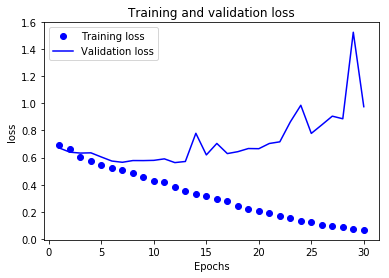

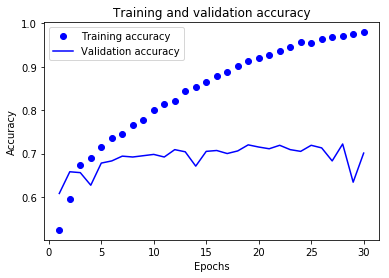

In [36]:
plot_history(history)
print(f"This model achieved {test_acc * 100:.2f}% accuracy on test data.")

## Use data augmentation
Previous example overfit severly and reached accuracy of 73.5%. We will use data augmentation to increase the variation of our dataset. It applies a series of simple transforms to images in dataset so no two used images will be the same(but they will still be simmilar).

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
# These are generators that can be used to create set up generators that will iterate over images in data folders.
datagen = ImageDataGenerator(rescale=1./255,
                             rotation_range=40,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest')

def make_image_generator(datagen,directory):
    return datagen.flow_from_directory(directory,
                                       target_size=(150, 150), 
                                       batch_size=20, 
                                       class_mode='binary')

# These are the generators that will generate the training images themselfs.
train_generator = make_image_generator(train_datagen, train_dir)
validation_generator = make_image_generator(validation_datagen, validation_dir)
test_generator = make_image_generator(test_datagen, test_dir)